### Mircosoft R Services

Microsoft R Services is a collection of software, services, and support that make the very 
popular R statistical computing environment a compelling tool for deployment within an 
enterprise. A full Microsoft R Services installation includes the following:
* Microsoft R Open: High-performance math libraries installed on top of a stable version of Open-Source R, including Base and Recommended Packages.
* RevoScaleR: an R package providing high-performance, scalable, parallelized, and distributable “Big Data Big Analytics.”
* DeployR: Enables application developers to collaborate with data scientists to deliver actionable intelligence securely and at scale via analytics Web services.
* Platform-specific tools: Software and services tuned to specific platforms, including Hadoop clusters, Teradata enterprise data warehouses, and Microsoft Windows desktops.

On the data science VM, we have installed the Microsoft R Services developer edition (which includes the Microsoft R Open, RevoScaleR) that you can use for developing your applications. You will need a separate license for production use. You can use the RevoIDE or the Jupyter notebook already installed on this VM to build applications in R. You can also download other IDEs like [RStudio](http://www.rstudio.com/products/rstudio/download/) to develop application with Microsoft R Services. 

We demonstrate a sample application below. A few more samples are found in:
__C:\Program Files\Microsoft\MRO-for-RRE\8.0\R-3.2.2\library\RevoScaleR\demoScripts__

We have also packaged some sample data sets at:
__C:\Program Files\Microsoft\MRO-for-RRE\8.0\R-3.2.2\library\RevoScaleR\SampleData__

In [1]:
#Need to do this first to ensure R device is rendered
options(jupyter.plot_mimetypes = 'image/png')

In [2]:
##########################################################
# A Tutorial Introduction to RevoScaleR
##########################################################

sampleDataDir <- rxGetOption("sampleDataDir")
getwd()
sampleDataDir
  

[1] "/dsvm/Notebooks"

[1] "/usr/lib64/microsoft-r/8.0/lib64/R/library/RevoScaleR/SampleData"

In [3]:
# Importing the data
inputFile <- file.path(sampleDataDir, "AirlineDemoSmall.csv")

airDS <- rxImport(inData = inputFile, outFile = "ADS.xdf", 
	missingValueString = "M", stringsAsFactors = TRUE)
colInfo <- list(DayOfWeek = list(type = "factor",
    levels = c("Monday", "Tuesday", "Wednesday", "Thursday", 
    "Friday", "Saturday", "Sunday")))

airDS <- rxImport(inData = inputFile, outFile = "ADS.xdf", 
	missingValueString = "M", colInfo  = colInfo, overwrite = TRUE)
  

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 1.898 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.465 seconds 
Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 1.644 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.459 seconds 


In [4]:
# Examining the new data file
nrow(airDS)
ncol(airDS)
head(airDS)

rxGetVarInfo(airDS)

[1] 6e+05

[1] 3

,ArrDelay,CRSDepTime,DayOfWeek
1,6,9.666666,Monday
2,-8,19.91667,Monday
3,-2,13.75,Monday
4,1,11.75,Monday
5,-2,6.416667,Monday
6,-14,13.83333,Monday


Var 1: ArrDelay, Type: integer, Low/High: (-86, 1490)
Var 2: CRSDepTime, Type: numeric, Storage: float32, Low/High: (0.0167, 23.9833)
Var 3: DayOfWeek
       7 factor levels: Monday Tuesday Wednesday Thursday Friday Saturday Sunday

In [5]:
# Read 10 rows into a data frame
myData <- rxDataStep(airDS, numRows=10, startRow=100000)
myData
levels(myData$DayOfWeek)
# Summarizing Your Data 
adsSummary <- rxSummary(~ArrDelay+CRSDepTime+DayOfWeek, data = airDS)
adsSummary <- summary( airDS )
  
adsSummary

Rows Read: 10, Total Rows Processed: 10, Total Chunk Time: 0.021 seconds 


,ArrDelay,CRSDepTime,DayOfWeek
1,-2,11.41667,Saturday
2,39,9.916667,Friday
3,NA,10.03333,Monday
4,1,17,Friday
5,-17,9.983334,Wednesday
6,8,21.25,Saturday
7,-9,6.25,Friday
8,-11,15,Friday
9,4,20.91667,Sunday
10,-8,6.5,Thursday


[1] "Monday"    "Tuesday"   "Wednesday" "Thursday"  "Friday"    "Saturday" 
[7] "Sunday"

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.027 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.013 seconds 
Computation time: 0.048 seconds.


Call:
rxSummary(formula = form, data = object, byTerm = TRUE, reportProgress = 0L)

Summary Statistics Results for: ~ArrDelay + CRSDepTime + DayOfWeek
Data: object (RxXdfData Data Source)
File name: ADS.xdf
Number of valid observations: 6e+05 
 
 Name       Mean     StdDev    Min        Max        ValidObs MissingObs
 ArrDelay   11.31794 40.688536 -86.000000 1490.00000 582628   17372     
 CRSDepTime 13.48227  4.697566   0.016667   23.98333 600000       0     

Category Counts for DayOfWeek
Number of categories: 7
Number of valid observations: 6e+05
Number of missing observations: 0

 DayOfWeek Counts
 Monday    97975 
 Tuesday   77725 
 Wednesday 78875 
 Thursday  81304 
 Friday    82987 
 Saturday  86159 
 Sunday    94975 

In [6]:
# Computing summary information by category
rxSummary(~ArrDelay:DayOfWeek, data = airDS)

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.015 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.014 seconds 
Computation time: 0.034 seconds.


Call:
rxSummary(formula = ~ArrDelay:DayOfWeek, data = airDS)

Summary Statistics Results for: ~ArrDelay:DayOfWeek
Data: airDS (RxXdfData Data Source)
File name: ADS.xdf
Number of valid observations: 6e+05 
 
 Name               Mean     StdDev   Min Max  ValidObs MissingObs
 ArrDelay:DayOfWeek 11.31794 40.68854 -86 1490 582628   17372     

Statistics by category (7 categories):

 Category                         DayOfWeek Means     StdDev   Min Max 
 ArrDelay for DayOfWeek=Monday    Monday    12.025604 40.02463 -76 1017
 ArrDelay for DayOfWeek=Tuesday   Tuesday   11.293808 43.66269 -70 1143
 ArrDelay for DayOfWeek=Wednesday Wednesday 10.156539 39.58803 -81 1166
 ArrDelay for DayOfWeek=Thursday  Thursday   8.658007 36.74724 -58 1053
 ArrDelay for DayOfWeek=Friday    Friday    14.804335 41.79260 -78 1490
 ArrDelay for DayOfWeek=Saturday  Saturday  11.875326 45.24540 -73 1370
 ArrDelay for DayOfWeek=Sunday    Sunday    10.331806 37.33348 -86 1202
 ValidObs
 95298   
 74011   
 76786   
 

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.287 secondsRows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.048 seconds 
Computation time: 0.355 seconds.
Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.311 secondsRows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.040 seconds 
Computation time: 0.365 seconds.


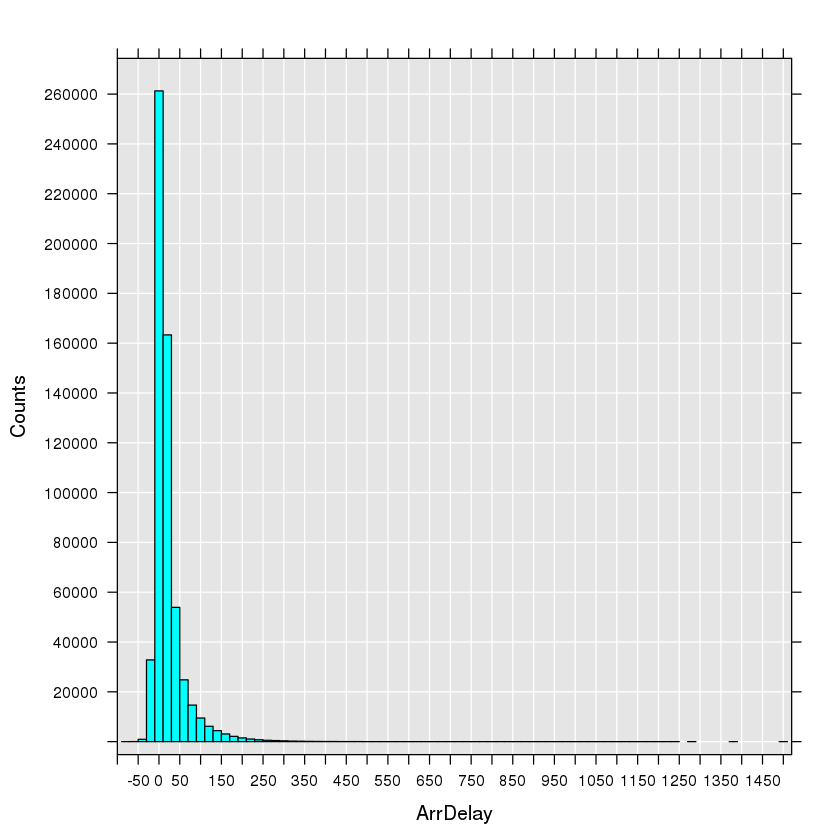

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.003 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.004 seconds 
Computation time: 0.012 seconds.


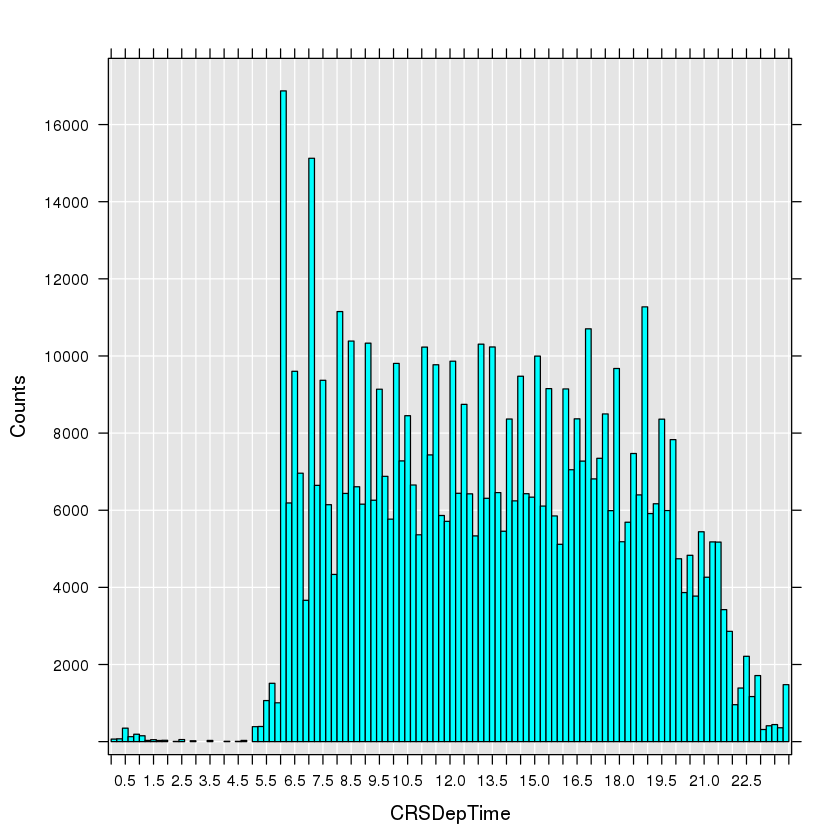

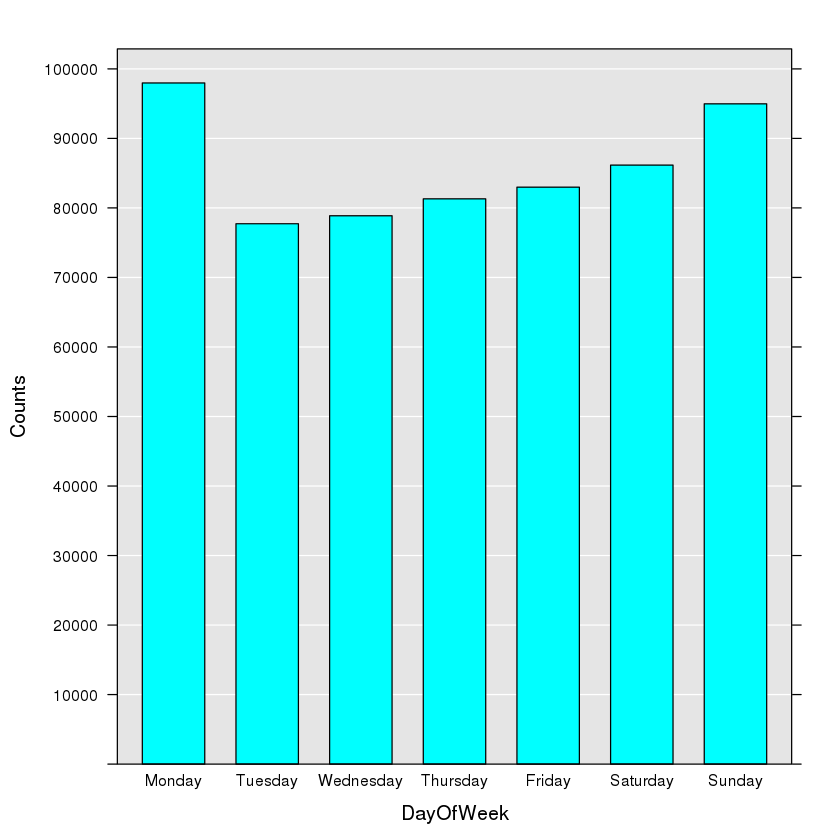

In [7]:
# Drawing histograms for each variable
rxHistogram(~ArrDelay, data = airDS)
rxHistogram(~CRSDepTime, data = airDS)
rxHistogram(~DayOfWeek, data = airDS)
  

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.070 secondsRows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.166 seconds 
Rows Read: 1296, Total Rows Processed: 1296, Total Chunk Time: 0.002 seconds 
Computation time: 0.006 seconds.


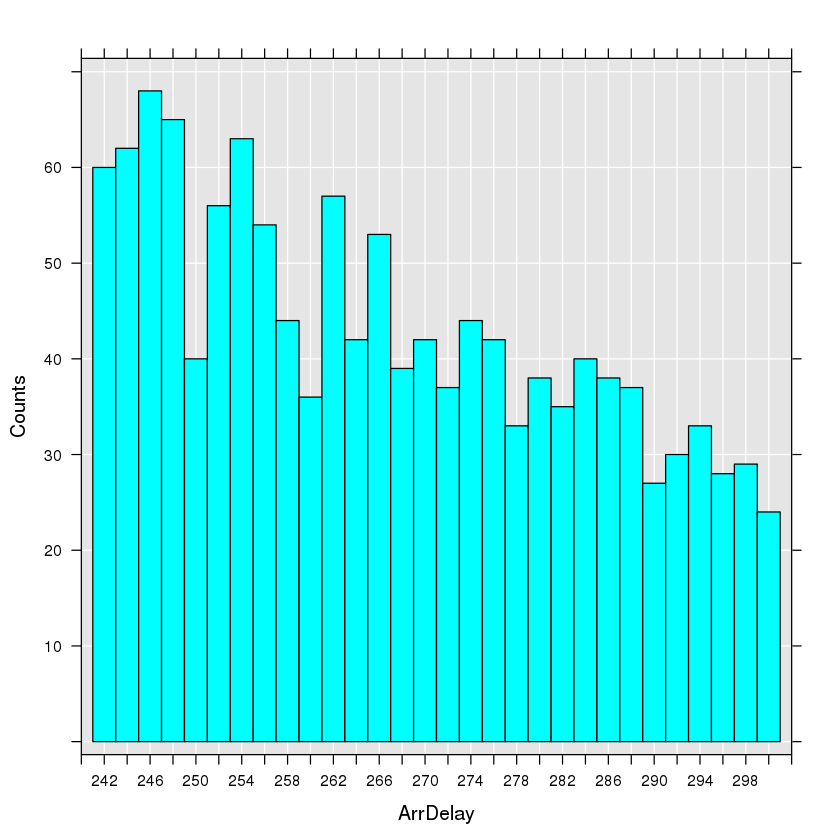

In [8]:
# Extracting a subsample into a data frame
myData <- rxDataStep(inData = airDS, 
rowSelection = ArrDelay > 240 & ArrDelay <= 300, 
	varsToKeep = c("ArrDelay", "DayOfWeek"))
rxHistogram(~ArrDelay, data = myData)
  

In [9]:
# Fitting a simple model
arrDelayLm1 <- rxLinMod(ArrDelay ~ DayOfWeek, data = airDS)
summary(arrDelayLm1)

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.016 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.014 seconds 
Computation time: 0.045 seconds.


Call:
rxLinMod(formula = ArrDelay ~ DayOfWeek, data = airDS)

Linear Regression Results for: ArrDelay ~ DayOfWeek
Data: airDS (RxXdfData Data Source)
File name: ADS.xdf
Dependent variable(s): ArrDelay
Total independent variables: 8 (Including number dropped: 1)
Number of valid observations: 582628
Number of missing observations: 17372 
 
Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          10.3318     0.1330  77.673 2.22e-16 ***
DayOfWeek=Monday      1.6938     0.1872   9.049 2.22e-16 ***
DayOfWeek=Tuesday     0.9620     0.2001   4.809 1.52e-06 ***
DayOfWeek=Wednesday  -0.1753     0.1980  -0.885    0.376    
DayOfWeek=Thursday   -1.6738     0.1964  -8.522 2.22e-16 ***
DayOfWeek=Friday      4.4725     0.1957  22.850 2.22e-16 ***
DayOfWeek=Saturday    1.5435     0.1934   7.981 2.22e-16 ***
DayOfWeek=Sunday     Dropped    Dropped Dropped  Dropped    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.021 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.018 seconds 
Computation time: 0.053 seconds.


Call:
rxLinMod(formula = ArrDelay ~ DayOfWeek, data = airDS, cube = TRUE)

Cube Linear Regression Results for: ArrDelay ~ DayOfWeek
Data: airDS (RxXdfData Data Source)
File name: ADS.xdf
Dependent variable(s): ArrDelay
Total independent variables: 7 
Number of valid observations: 582628
Number of missing observations: 17372 
 
Coefficients:
                    Estimate Std. Error t value Pr(>|t|)     | Counts
DayOfWeek=Monday     12.0256     0.1317   91.32 2.22e-16 *** |  95298
DayOfWeek=Tuesday    11.2938     0.1494   75.58 2.22e-16 *** |  74011
DayOfWeek=Wednesday  10.1565     0.1467   69.23 2.22e-16 *** |  76786
DayOfWeek=Thursday    8.6580     0.1445   59.92 2.22e-16 *** |  79145
DayOfWeek=Friday     14.8043     0.1436  103.10 2.22e-16 *** |  80142
DayOfWeek=Saturday   11.8753     0.1404   84.59 2.22e-16 *** |  83851
DayOfWeek=Sunday     10.3318     0.1330   77.67 2.22e-16 *** |  93395
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.6

,DayOfWeek,ArrDelay,Counts
1,Monday,12.0256,95298
2,Tuesday,11.29381,74011
3,Wednesday,10.15654,76786
4,Thursday,8.658007,79145
5,Friday,14.80433,80142
6,Saturday,11.87533,83851
7,Sunday,10.33181,93395


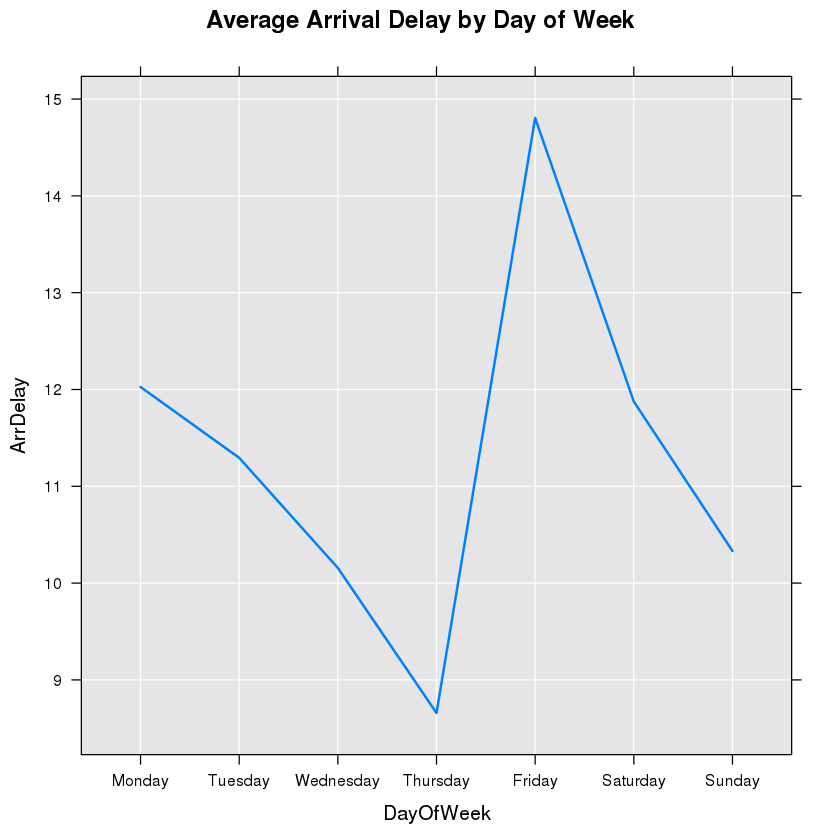

In [10]:
# Using the cube argument
arrDelayLm2 <- rxLinMod(ArrDelay ~ DayOfWeek, data = airDS, 
cube = TRUE)
summary(arrDelayLm2)
countsDF <- rxResultsDF(arrDelayLm2, type = "counts")
countsDF
rxLinePlot(ArrDelay~DayOfWeek, data = countsDF,
    main = "Average Arrival Delay by Day of Week")


Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.023 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.020 seconds 
Computation time: 0.053 seconds.


,DayOfWeek,CRSDepTime,ArrDelay,Counts
1,Monday,0,7.43609,133
2,Tuesday,0,7,107
3,Wednesday,0,3.785714,98
4,Thursday,0,3.009709,103
5,Friday,0,4.475248,101
6,Saturday,0,4.546099,141
7,Sunday,0,0.9243697,119
8,Monday,1,2.659091,44
9,Tuesday,1,5.542857,35
10,Wednesday,1,-5.969697,33


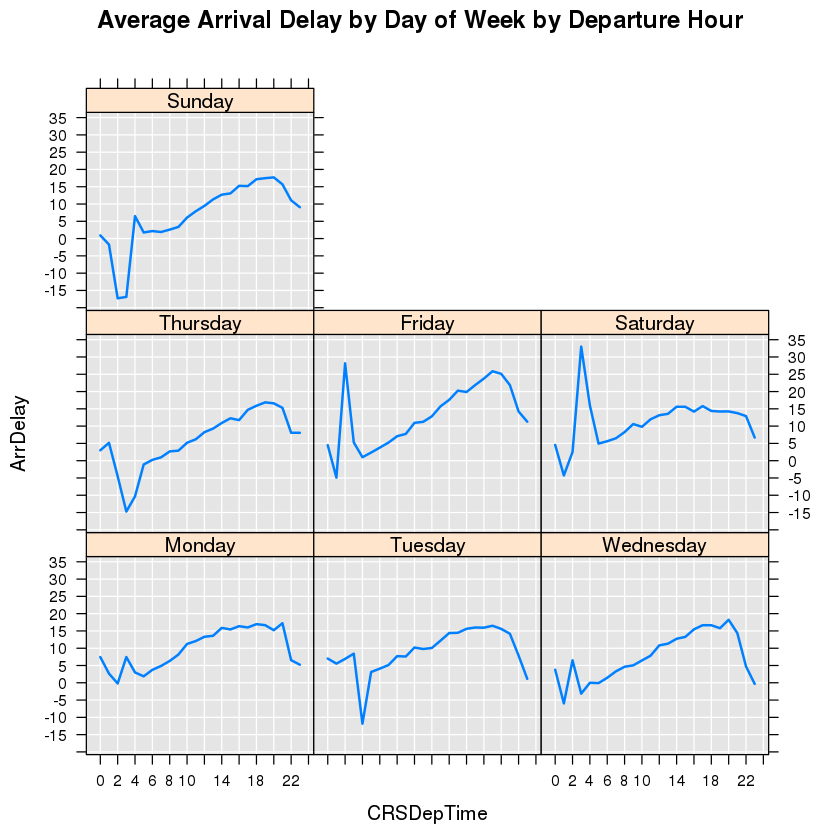

In [11]:
# A linear model with multiple independent variables
arrDelayLm3 <- rxLinMod(ArrDelay ~ DayOfWeek:F(CRSDepTime), 
data = airDS, cube = TRUE)
arrDelayDT <- rxResultsDF(arrDelayLm3, type = "counts")
head(arrDelayDT, 15)
rxLinePlot( ArrDelay~CRSDepTime|DayOfWeek, data = arrDelayDT,
    title = "Average Arrival Delay by Day of Week by Departure Hour")
  

In [12]:
# Creating a subset of the data set and computing a Crosstab
airLateDS <- rxDataStep(inData = airDS, outFile = "ADS1.xdf", 
    varsToDrop = c("CRSDepTime"), 
    rowSelection = ArrDelay > 15)
ncol(airLateDS)
nrow(airLateDS)
myTab <- rxCrossTabs(ArrDelay~DayOfWeek, data = airLateDS)
summary(myTab, output = "means")
  

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.046 secondsRows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.013 seconds 


[1] 2

[1] 148526

Rows Read: 121833, Total Rows Processed: 121833, Total Chunk Time: 0.006 seconds
Rows Read: 26693, Total Rows Processed: 148526, Total Chunk Time: 0.007 seconds 
Computation time: 0.018 seconds.


Call:
rxCrossTabs(formula = ArrDelay ~ DayOfWeek, data = airLateDS)

Cross Tabulation Results for: ArrDelay ~ DayOfWeek
File name: /dsvm/Notebooks/ADS1.xdf
Dependent variable(s): ArrDelay
Number of valid observations: 148526
Number of missing observations: 0 
Statistic: means 
 
ArrDelay (means):
             means  means %
Monday    56.94491 13.96327
Tuesday   64.28248 15.76249
Wednesday 60.12724 14.74360
Thursday  55.07093 13.50376
Friday    56.11783 13.76047
Saturday  61.92247 15.18380
Sunday    53.35339 13.08261
Col Mean  57.96692         

In [13]:
# Creating a new data set with variable transformations
airExtraDS <- rxDataStep(inData = airDS, outFile="ADS2.xdf", 
	transforms=list( 
		Late = ArrDelay > 15, 
		DepHour = as.integer(CRSDepTime),
		Night = DepHour >= 20 | DepHour <= 5))
                
rxGetInfo(airExtraDS, getVarInfo=TRUE, numRows=5)
  

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.341 secondsRows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.036 seconds 


File name: /dsvm/Notebooks/ADS2.xdf 
Number of observations: 6e+05 
Number of variables: 6 
Number of blocks: 2 
Compression type: zlib 
Variable information: 
Var 1: ArrDelay, Type: integer, Low/High: (-86, 1490)
Var 2: CRSDepTime, Type: numeric, Storage: float32, Low/High: (0.0167, 23.9833)
Var 3: DayOfWeek
       7 factor levels: Monday Tuesday Wednesday Thursday Friday Saturday Sunday
Var 4: Late, Type: logical, Low/High: (0, 1)
Var 5: DepHour, Type: integer, Low/High: (0, 23)
Var 6: Night, Type: logical, Low/High: (0, 1)
Data (5 rows starting with row 1):
  ArrDelay CRSDepTime DayOfWeek  Late DepHour Night
1        6   9.666666    Monday FALSE       9 FALSE
2       -8  19.916666    Monday FALSE      19 FALSE
3       -2  13.750000    Monday FALSE      13 FALSE
4        1  11.750000    Monday FALSE      11 FALSE
5       -2   6.416667    Monday FALSE       6 FALSE

In [14]:
# Running a logistic regression using the new data
logitObj <- rxLogit(Late~DepHour + Night, data = airExtraDS)
summary(logitObj)

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.012 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.017 seconds 

Starting values (iteration 1) time: 0.041 secs.
Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.011 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.038 seconds 

Iteration 2 time: 0.065 secs.
Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.012 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.033 seconds 

Iteration 3 time: 0.059 secs.
Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.012 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.029 seconds 

Iteration 4 time: 0.056 secs.

Elapsed computation time: 0.222 secs.


Call:
rxLogit(formula = Late ~ DepHour + Night, data = airExtraDS)

Logistic Regression Results for: Late ~ DepHour + Night
Data: airExtraDS (RxXdfData Data Source)
File name: /dsvm/Notebooks/ADS2.xdf
Dependent variable(s): Late
Total independent variables: 3 
Number of valid observations: 582628
Number of missing observations: 17372 
-2*LogLikelihood: 649607.8613 (Residual deviance on 582625 degrees of freedom)
 
Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.0990076  0.0104460 -200.94 2.22e-16 ***
DepHour      0.0790215  0.0007671  103.01 2.22e-16 ***
Night       -0.3027030  0.0109914  -27.54 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Condition number of final variance-covariance matrix: 3.0178 
Number of iterations: 4

In [15]:
# Computing predicted values
predictDS <- rxPredict(modelObject = logitObj, data = airExtraDS,
outData = airExtraDS)
rxGetInfo(predictDS, getVarInfo=TRUE, numRows=5)

Rows Read: 500000, Total Rows Processed: 500000, Total Chunk Time: 0.012 seconds
Rows Read: 100000, Total Rows Processed: 600000, Total Chunk Time: 0.042 seconds 


File name: /dsvm/Notebooks/ADS2.xdf 
Number of observations: 6e+05 
Number of variables: 7 
Number of blocks: 2 
Compression type: zlib 
Variable information: 
Var 1: ArrDelay, Type: integer, Low/High: (-86, 1490)
Var 2: CRSDepTime, Type: numeric, Storage: float32, Low/High: (0.0167, 23.9833)
Var 3: DayOfWeek
       7 factor levels: Monday Tuesday Wednesday Thursday Friday Saturday Sunday
Var 4: Late, Type: logical, Low/High: (0, 1)
Var 5: DepHour, Type: integer, Low/High: (0, 23)
Var 6: Night, Type: logical, Low/High: (0, 1)
Var 7: Late_Pred, Type: numeric, Low/High: (0.0830, 0.3580)
Data (5 rows starting with row 1):
  ArrDelay CRSDepTime DayOfWeek  Late DepHour Night Late_Pred
1        6   9.666666    Monday FALSE       9 FALSE 0.1997569
2       -8  19.916666    Monday FALSE      19 FALSE 0.3548931
3       -2  13.750000    Monday FALSE      13 FALSE 0.2550745
4        1  11.750000    Monday FALSE      11 FALSE 0.2262215
5       -2   6.416667    Monday FALSE       6 FALSE 0.1645331

In [16]:
# Clean-up created files
if (file.exists("ADS.xdf")) file.remove("ADS.xdf")
if (file.exists("ADS1.xdf")) file.remove("ADS1.xdf") 
if (file.exists("ADS2.xdf")) file.remove("ADS2.xdf")

[1] TRUE

[1] TRUE

[1] TRUE